Women_7210

In [1]:
import pandas as pd
import numpy as np

In [2]:
women_shoes_7210= pd.read_csv('C:\\Users\\giuli\\project_w_EXP\\woman-shoes\\7210_1.csv')

C:\Users\giuli\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
women_shoes_7210=women_shoes_7210[women_shoes_7210['prices.currency']=='USD']

In [4]:
women_shoes_7210=women_shoes_7210[['name', 'id','brand', 'categories', 'reviews']]
women_shoes_7210.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32680 entries, 0 to 33800
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        32680 non-null  object
 1   id          32680 non-null  object
 2   brand       32668 non-null  object
 3   categories  32680 non-null  object
 4   reviews     4164 non-null   object
dtypes: object(5)
memory usage: 1.5+ MB


In [5]:
women_shoes_7210['reviews'].unique().size

592

In [6]:
r=women_shoes_7210[['name', 'reviews', 'brand', 'categories']].groupby('categories').count().sort_values(by=['reviews'], ascending=False)
r[r.reviews>0]
print(r)

                                                    name  reviews  brand
categories                                                              
Boots On Sale,Shoes,Women's Shoes,Boots              827      245    827
Shoes,Slip-ons,Women's Shoes                        1456      162   1456
Clothing,Shoes,Women's Shoes,All Women's Shoes      3146      150   3145
Heels,Shoes,Women's Shoes,Journee Collection         400      149    400
Boots On Sale,Shoes,Women's Shoes,Boots,Journee...   142      139    142
...                                                  ...      ...    ...
Men's Boots,Men's Casual Shoes,Shoes,Men's Shoe...     2        0      2
Men's Character Shop,Character Shop,Shoes,Women...     3        0      3
Men's Sandals,Shoes,Men's Shoes,Women's Shoes,C...     6        0      6
Narrow Calf,Women,Extended Size Shoes                  1        0      1
toys,Shoes,Women's Shoes                               3        0      3

[861 rows x 3 columns]


In [7]:
p=women_shoes_7210[['reviews', 'brand', 'categories']].groupby('brand').count()


p=p[p.reviews>30]
p

,reviews,categories
brand,,
Acorn,32,113
BETANI,42,201
Beston,104,240
Bloch,85,95
Bongo,35,51
Daniel Green,43,71
Dr. Scholl's,33,109
Dyeables,84,301
Earth Spirit,35,39


__Andiamo a verificare che le categorie sportivo-casual siano le più rappresentate nelle recesioni__

In [8]:
women_shoes_7210['reviews'].unique()

array(['[{"date":"2017-01-10T00:00:00.000Z","dateAdded":"2017-03-06T14:47:43Z","dateSeen":["2017-03-02T18:10:15.094Z"],"rating":5.0,"sourceURLs":["https://www.overstock.com/Worldstock-Fair-Trade/Handcrafted-Alpaca-Blend-Purple-Charisma-Sweater-Peru/12420822/customer-reviews.html"],"text":"well made sweater fit true to size","title":"AS","username":"Antoinette M."}]',
       nan,
       '[{"date":"2016-01-04T00:00:00Z","dateAdded":"2016-01-02T03:06:10Z","dateSeen":["2016-03-14T00:00:00Z"],"rating":5.0,"sourceURLs":["http://www.sears.com/content/pdp/ratings/single/search/Sears/054VA84333312P&targetType=product&limit=1000&offset=0"],"text":"She\'s 7 and is wearing these boots, like everyday! It\'s cute and stylish for my spunky niece - perfect match!! It could be dressed up or down, just a great deal in general.","title":"My niece loves it!!","username":"317"},{"date":"2016-01-01T00:00:00Z","dateAdded":"2016-01-02T03:06:10Z","dateSeen":["2016-03-14T00:00:00Z"],"rating":5.0,"sourceURLs":["

In [9]:
import json
import math
import sys

In [10]:
p=women_shoes_7210[['reviews', 'id']].groupby('id').count()


p=p[p.reviews>10]
print(p.max())
print(p.min())

reviews    57
dtype: int64
reviews    11
dtype: int64


In [11]:
import json
import math
import sys

In [12]:
def extract_averge_review(reviews):
    try:
        if (type(reviews) == float):
            return None
        
        if (type(reviews) != str):
            #print( f"WARN not a string but a {type(reviews)} {reviews}" )
            return None
        
        reviews = reviews.replace("\\\\", "\\")
        kvs = json.loads(reviews)
        ratings = []
        for kv in kvs:
            if("rating" in kv):
                #print( f"\n\n{kv}" )
                ratings.append( float( kv["rating"] ) )
                
        #print( f"\n\n{ratings}" )
        
        # questo blocco è per fare qualcosa di utile con i voti di un prodotto.
        # ad esempio in questo caso viene calcolata la media delle recensioni
        if len(ratings) == 0:
            return None
        else:
            total = 0.0
            for r in ratings:
                total = total + r
            avg = total / len(ratings)
            return avg        
                
    except:
        err_type, err_value, err_traceback = sys.exc_info()
        #print( f"WARN '{err_type}' '{err_value}' parsing {reviews}" )
        return None 
    


# Questo crea una colonna con il valore medio delle review per quel prodotto
women_shoes_7210["average_reviews"] = women_shoes_7210["reviews"].apply( extract_averge_review )

# Questo è solo per ispezionare le righe che hanno un qualche valore di recensione
women_shoes_7210=women_shoes_7210[ women_shoes_7210["reviews"].isnull()==False ]



In [13]:
r=women_shoes_7210[['reviews', 'brand', 'categories']].groupby('categories').count().sort_values(by=['reviews'], ascending=False)
r[r.reviews>0]

,reviews,brand
categories,,
"Boots On Sale,Shoes,Women's Shoes,Boots",245,245
"Shoes,Slip-ons,Women's Shoes",162,162
"Clothing,Shoes,Women's Shoes,All Women's Shoes",150,150
"Heels,Shoes,Women's Shoes,Journee Collection",149,149
"Boots On Sale,Shoes,Women's Shoes,Boots,Journee Collection",139,139
...,...,...
"Shoes,Women's Shoes,Women's Flats,Gifts,By Recipient,Teen Girl,Women's,Juniors',Mother's Day,Women's Casual Shoes",1,1
"Women's Casual Shoes,Shoes,Women's Shoes,Clothing",1,1
"Hiking Boots,Women,Shoes,Outdoor",1,1


In [14]:
women_shoes_7210

,name,id,brand,categories,reviews,average_reviews
0,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",5.000000
1,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",5.000000
2,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",5.000000
3,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",5.000000
4,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,AVpe__eOilAPnD_xSt-H,Novica,"Access.,Clothing,Shoes,Women's Clothing","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",5.000000
...,...,...,...,...,...,...
29182,DF by Dearfoams Women's Micro Fiber Terru Open...,AVsRmM54U2_QcyX9PJIg,DF by Dearfoams,"Clothing,Shoes,Women's Shoes,All Women's Shoes","[{""date"":""2016-03-26T00:00:00.000Z"",""dateAdded...",4.555556
29183,Women's Comfort Sandal,AVsRmQUrnnc1JgDc36Pe,Unbranded,"Clothing,Shoes,Women's Shoes,All Women's Shoes","[{""date"":""2017-01-17T00:00:00.000Z"",""dateAdded...",5.000000
29184,Women's Comfort Sandal,AVsRmQUrnnc1JgDc36Pe,Unbranded,"Clothing,Shoes,Women's Shoes,All Women's Shoes","[{""date"":""2017-01-17T00:00:00.000Z"",""dateAdded...",5.000000
29185,Women's Comfort Sandal,AVsRmQUrnnc1JgDc36Pe,Unbranded,"Clothing,Shoes,Women's Shoes,All Women's Shoes","[{""date"":""2017-01-17T00:00:00.000Z"",""dateAdded...",5.000000


In [15]:
women_shoes_7210['categories']

0               Access.,Clothing,Shoes,Women's Clothing
1               Access.,Clothing,Shoes,Women's Clothing
2               Access.,Clothing,Shoes,Women's Clothing
3               Access.,Clothing,Shoes,Women's Clothing
4               Access.,Clothing,Shoes,Women's Clothing
                              ...                      
29182    Clothing,Shoes,Women's Shoes,All Women's Shoes
29183    Clothing,Shoes,Women's Shoes,All Women's Shoes
29184    Clothing,Shoes,Women's Shoes,All Women's Shoes
29185    Clothing,Shoes,Women's Shoes,All Women's Shoes
29187    Clothing,Shoes,Women's Shoes,All Women's Shoes
Name: categories, Length: 4164, dtype: object

In [16]:
rows = women_shoes_7210["categories"].unique()
#print(rows)
s = set()
for row in rows:
    #print("-- " + row)
    categories = row.split(",")
    for category in categories:
        print("---- " + category)
        s.add(category)
print(len(s))

---- Access.
---- Clothing
---- Shoes
---- Women's Clothing
---- Women's Casual Shoes
---- Shoes
---- Women's Boots
---- Women's Shoes
---- Mid-Calf
---- Women
---- Shoes
---- Boots
---- Flats
---- Clothing
---- Shoes
---- Women's Shoes
---- All Women's Shoes
---- Boots On Sale
---- Shoes
---- Women's Shoes
---- Sale
---- Boots
---- Special Offers
---- Journee Collection
---- Mid-Calf
---- Women
---- Athletic
---- Women
---- Shoes
---- Shoes
---- Slip-ons
---- Women's Shoes
---- Shoes
---- Women's Shoes
---- Boots
---- Shoes
---- Women's Shoes
---- Knee-High Boots
---- Boots
---- Clothing
---- Shoes
---- Women's Shoes
---- Women's Boots
---- Boots
---- Shoes
---- Women's Shoes
---- Ankle Boots
---- Sandals
---- Shoes
---- Women's Shoes
---- Men's Shoes
---- Women
---- Riding Boots
---- Mid-Calf
---- Women
---- Shoes
---- Boots
---- Clothing
---- Shoes
---- Women's Shoes
---- All Women's Shoes
---- Low Slide Sandals
---- Shoes
---- Women's Shoes
---- Women's Slippers
---- Flip Flop Slip

def extr_cat(x):
    for i in x:
        if 'Athletic' in x:
            return 'Athletic'

In [17]:
#women_shoes_7210['Athletic']=women_shoes_7210['categories'].apply(extr_cat)

"Athletic", "Oxfords", "Walking Shoes", "Womens' Athletic Shoes", "Running", "Golf Equipment", "Women's Golf Shoes", "Nike", "Loafers", "Slip-ons", "Womens' Athletic Shoes", "Women's Slippers", "Running Shoes", "Golf Shoes", "Gravity Defyer", "Team Sports", "Basketball", "Hiking Shoes", "Outdoor", "Women's Casual Shoes", "Racquet Sports", "Moccasin Slippers", "Loafers & Slip-Ons"

In [18]:
cat_def={"Athletic", 'Fashion Sneakers', "Oxfords", "Walking Shoes", "Womens' Athletic Shoes", "Running", "Golf Equipment", "Women's Golf Shoes", "Nike", "Loafers", "Slip-ons", "Womens' Athletic Shoes", "Women's Slippers", "Women's Casual Shoes", "Running Shoes", "Golf Shoes", "Gravity Defyer", "Team Sports", "Basketball", "Hiking Shoes", "Outdoor", "Women's Casual Shoes", "Racquet Sports", "Moccasin Slippers", "Loafers & Slip-Ons", "Sneakers", }

In [19]:
def y(x):
    cat_def={"Athletic", 'Fashion Sneakers', "Oxfords", "Walking Shoes", "Womens' Athletic Shoes", "Running", "Golf Equipment", "Women's Golf Shoes", "Nike", "Loafers", "Slip-ons", "Womens' Athletic Shoes", "Women's Slippers", "Women's Casual Shoes", "Running Shoes", "Golf Shoes", "Gravity Defyer", "Team Sports", "Basketball", "Hiking Shoes", "Outdoor", "Women's Casual Shoes", "Racquet Sports", "Moccasin Slippers", "Loafers & Slip-Ons", "Sneakers", }
    p=''
    for i in cat_def:
        if i in x:
            p=p+i+', '
    return p[:-2]

In [20]:
def g(x):
    for i in x:
        return y(x)

In [21]:
women_shoes_7210['Categorie_Casual/Sport']= women_shoes_7210['categories'].apply(g)

In [22]:
WOM_ALTRE_CAT=women_shoes_7210[women_shoes_7210['Categorie_Casual/Sport']=='']

In [25]:
women_shoes_7210=women_shoes_7210[women_shoes_7210['Categorie_Casual/Sport']!='']

In [26]:
p=women_shoes_7210[['reviews', 'Categorie_Casual/Sport']].groupby('Categorie_Casual/Sport').count().sort_values(by=['reviews'], ascending=False)


p=p[p.reviews>0]
p

,reviews
Categorie_Casual/Sport,
Slip-ons,429
Athletic,193
Loafers,174
Women's Slippers,118
"Athletic, Running",115
Women's Casual Shoes,94
"Athletic, Womens' Athletic Shoes",41
"Athletic, Womens' Athletic Shoes, Gravity Defyer",38
"Sneakers, Fashion Sneakers",38


In [27]:
women_shoes_7210

,name,id,brand,categories,reviews,average_reviews,Categorie_Casual/Sport
99,Personal Identity Women's Castro Black Slouch ...,AVpe_Auy1cnluZ0-bVf3,Personal Identity,"Women's Casual Shoes,Shoes,Women's Boots,Women...","[{""date"":""2016-01-04T00:00:00Z"",""dateAdded"":""2...",3.966667,Women's Casual Shoes
298,Flip Iii Shoe - Women's,AVpe_KSZ1cnluZ0-bY5y,Chassé,"Athletic,Women,Shoes","[{""date"":""2013-12-19T00:00:00Z"",""dateAdded"":""2...",NaN,Athletic
415,Women's Walking Cradles Faye Black Leather,AVpe_z63ilAPnD_xSp3n,Walking Cradles,"Shoes,Slip-ons,Women's Shoes","[{""date"":""2008-07-02T00:00:00Z"",""dateAdded"":""2...",NaN,Slip-ons
659,Dynamo Dance Sneaker,AVpe4nDxLJeJML43xd2M,Sansha,"Athletic,Women,Shoes","[{""date"":""2012-12-27T00:00:00Z"",""dateAdded"":""2...",NaN,Athletic
668,Women's Acorn New Spa Thong Black,AVpe4OKBilAPnD_xP4Zf,Acorn,"Shoes,Women's Shoes,Women's Slippers,Flip Flop...","[{""date"":""2015-03-08T06:00:00Z"",""dateAdded"":""2...",4.166667,Women's Slippers
...,...,...,...,...,...,...,...
24578,Women's Trotters Allison Navy Soft Kid Leather,AVpjTxZpilAPnD_xMQD2,Trotters,"Loafers,Shoes,Women's Shoes","[{""date"":""2011-03-30T05:00:00Z"",""dateAdded"":""2...",3.200000,Loafers
24579,Women's Trotters Allison Navy Soft Kid Leather,AVpjTxZpilAPnD_xMQD2,Trotters,"Loafers,Shoes,Women's Shoes","[{""date"":""2011-03-30T05:00:00Z"",""dateAdded"":""2...",3.200000,Loafers
24580,Women's Trotters Allison Navy Soft Kid Leather,AVpjTxZpilAPnD_xMQD2,Trotters,"Loafers,Shoes,Women's Shoes","[{""date"":""2011-03-30T05:00:00Z"",""dateAdded"":""2...",3.200000,Loafers
24581,Women's Trotters Allison Navy Soft Kid Leather,AVpjTxZpilAPnD_xMQD2,Trotters,"Loafers,Shoes,Women's Shoes","[{""date"":""2011-03-30T05:00:00Z"",""dateAdded"":""2...",3.200000,Loafers


In [30]:
WOM_ALTRE_CAT['categories'].unique()

array(["Access.,Clothing,Shoes,Women's Clothing",
       'Mid-Calf,Women,Shoes,Boots',
       "Flats,Clothing,Shoes,Women's Shoes,All Women's Shoes",
       "Boots On Sale,Shoes,Women's Shoes,Sale,Boots,Special Offers,Journee Collection,Mid-Calf,Women",
       "Shoes,Women's Shoes", "Boots,Shoes,Women's Shoes,Knee-High Boots",
       "Boots,Clothing,Shoes,Women's Shoes,Women's Boots",
       "Boots,Shoes,Women's Shoes,Ankle Boots",
       "Sandals,Shoes,Women's Shoes,Men's Shoes,Women",
       'Riding Boots,Mid-Calf,Women,Shoes,Boots',
       "Clothing,Shoes,Women's Shoes,All Women's Shoes,Low Slide Sandals",
       "Clothing,Shoes,Women's Shoes,All Women's Shoes,Sandals",
       "Shoes,Women's Boots,Women's Shoes,Clothing", 'Shoes,Women,Flats',
       'Shoes,Women,Boots',
       'Cell,Clothing, Shoes & Jewelry,Women,Watches,Wrist Watches',
       'Sandals,Women,Shoes', 'Shoes,Women,Pumps',
       "Shoes,Clothing,Women's Shoes,All Women's Shoes",
       "Shoes,Women's Shoes,Clothing,Al

In [58]:
p=WOM_ALTRE_CAT[['reviews', 'categories']].groupby('categories').count().sort_values(by=['reviews'], ascending=False)


p=p[p.reviews>10]
p

,reviews
categories,
"Boots On Sale,Shoes,Women's Shoes,Boots",245
"Clothing,Shoes,Women's Shoes,All Women's Shoes",150
"Heels,Shoes,Women's Shoes,Journee Collection",149
"Boots On Sale,Shoes,Women's Shoes,Boots,Journee Collection",139
"Access.,Clothing,Shoes,Women's Clothing,Novica,Worldstock Fair Trade",137
"Booties,Shoes,Women's Shoes",128
"Access.,Clothing,Shoes,Women's Clothing",100
"Boots On Sale,Shoes,Women's Shoes,Boots,Clothing,All Women's Shoes",92
"Boots,Shoes,Women's Shoes",77


__Come sono divise le recensioni per categoria?__ 

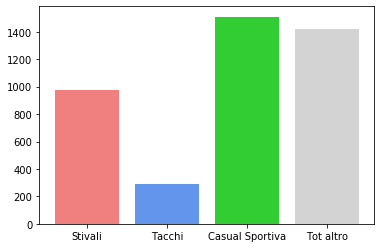

In [60]:
import matplotlib.pyplot as plot
recensioni = [978, 290, 1510, 1422]
tipologia_scarpe = ('Stivali', 'Tacchi', 'Casual Sportiva', 'Tot altro')
y_pos = np.arange(len(tipologia_scarpe))

plot.bar(y_pos, recensioni, color=['lightcoral', 'cornflowerblue', 'limegreen', 'lightgrey'])
plot.xticks(y_pos, tipologia_scarpe)
plot.show()